# Linear Regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline
os.getcwd()

'/Users/Edureka/Python'

## Import Dataset

In [2]:
insurance=pd.read_csv('../insurance.csv')

## EDA

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.sample(5)

,age,sex,bmi,children,smoker,region,charges
1290,38,female,19.950,2,no,northeast,7133.90250
968,21,male,25.745,2,no,northeast,3279.86855
66,61,female,39.100,2,no,southwest,14235.07200
1214,27,female,31.255,1,no,northwest,3956.07145
605,51,female,34.100,0,no,southeast,9283.56200


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


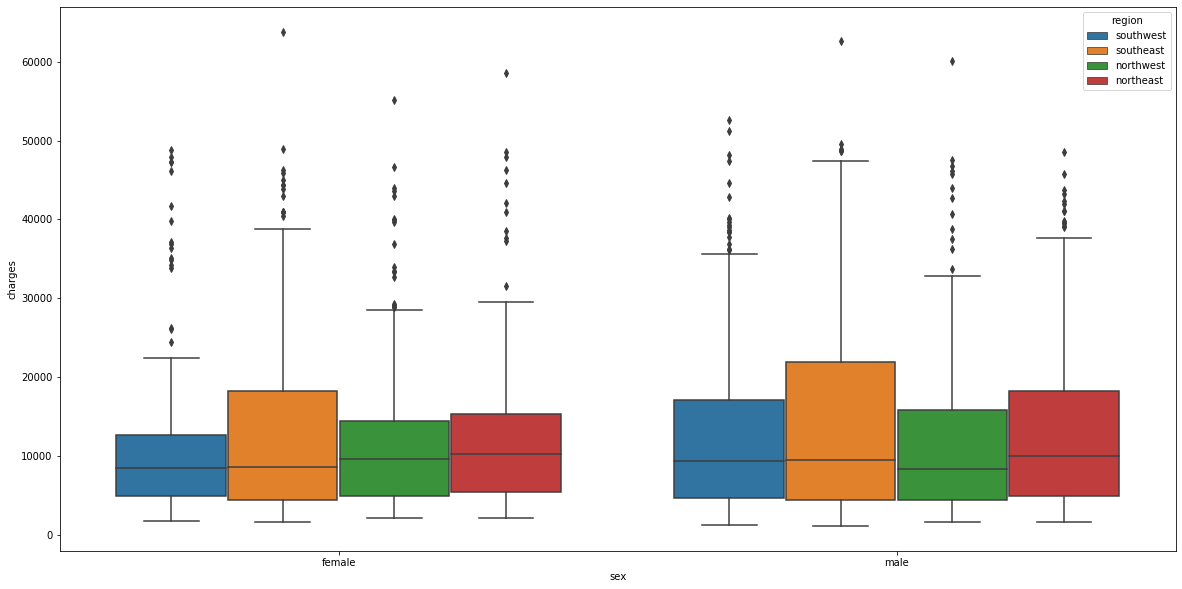

In [6]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(x='sex',y='charges',hue='region',data=insurance)

In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

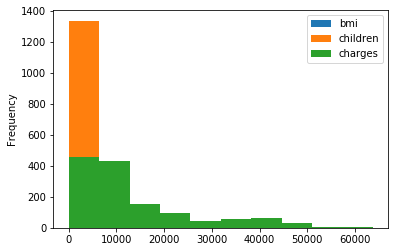

In [8]:
insurance.plot('age',kind='hist')

## Convert categorical Variables to numeric

## Using Get Dummies method

In [9]:
processed_data=pd.get_dummies(insurance)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null uint8
sex_male            1338 non-null uint8
smoker_no           1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northeast    1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [10]:
processed_data.sample(6)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1179,31,29.810,0,19350.36890,0,1,0,1,0,0,1,0
570,31,29.100,0,3761.29200,1,0,1,0,0,0,0,1
882,21,22.135,0,2585.85065,1,0,1,0,1,0,0,0
820,45,33.700,1,7445.91800,0,1,1,0,0,0,0,1
1168,32,35.200,2,4670.64000,0,1,1,0,0,0,0,1
1150,18,30.305,0,2203.73595,1,0,1,0,1,0,0,0


## Using Label Encoder

In [11]:
le=LabelEncoder()

In [12]:
insurance.columns
insurance.sex.unique()

array(['female', 'male'], dtype=object)

In [13]:
categorical=[c for c in insurance.columns if insurance.dtypes[c]=='object']
continous=[c for c in insurance.columns if insurance.dtypes[c]!='object']
print(categorical)
print(continous)

print(insurance[categorical[2]])

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']
0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object


In [14]:
le_sex=LabelEncoder()
le_smoker=LabelEncoder()
le_region=LabelEncoder()
insurance[categorical[0]]=le_sex.fit_transform(insurance[categorical[0]])
insurance[categorical[1]]=le_smoker.fit_transform(insurance[categorical[1]])
insurance[categorical[2]]=le_region.fit_transform(insurance[categorical[2]])


In [15]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [16]:
insurance.sample(4)

,age,sex,bmi,children,smoker,region,charges
463,56,1,25.935,0,0,0,11165.41765
264,53,0,38.060,3,0,2,20462.99766
1246,45,0,25.700,3,0,3,9101.79800
1191,41,0,21.755,1,0,0,13725.47184


## Split the target and predictor variables

In [17]:
test=insurance['charges']
train=insurance.drop('charges',axis=1)

In [18]:
test.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [19]:
train.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(train,test,test_size=0.3,random_state=123)

In [21]:
type(xtrain)

pandas.core.frame.DataFrame

In [22]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 300 to 1122
Data columns (total 6 columns):
age         936 non-null int64
sex         936 non-null int64
bmi         936 non-null float64
children    936 non-null int64
smoker      936 non-null int64
region      936 non-null int64
dtypes: float64(1), int64(5)
memory usage: 51.2 KB


In [23]:
xtrain.sample(4)

,age,sex,bmi,children,smoker,region
1215,18,1,39.14,0,0,0
719,58,0,33.44,0,0,1
112,37,1,30.80,0,0,3
224,42,1,24.64,0,1,2


In [24]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 650 to 50
Data columns (total 6 columns):
age         402 non-null int64
sex         402 non-null int64
bmi         402 non-null float64
children    402 non-null int64
smoker      402 non-null int64
region      402 non-null int64
dtypes: float64(1), int64(5)
memory usage: 22.0 KB


In [25]:
type(ytrain)

pandas.core.series.Series

In [26]:
ytrain[1:10]

904    12644.58900
670     4837.58230
617    23306.54700
373    36085.21900
299     9249.49520
376    21659.93010
384     8302.53565
251    47305.30500
733     9447.25035
Name: charges, dtype: float64

In [27]:
ytest[1:10]

319      4667.60765
314     34838.87300
150      5125.21570
336     12142.57860
970     10702.64240
169      4827.90495
684      4766.02200
1097     1674.63230
512      9361.32680
Name: charges, dtype: float64

## Scale the dataset using Standard Scaler

In [28]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [29]:
type(xtrain)

numpy.ndarray

In [30]:
xtrain.shape

(936, 6)

In [31]:
xtest.shape

(402, 6)

In [32]:
type(xtest)

numpy.ndarray

In [33]:
xtest[1:10]

array([[-0.53340634,  0.97542622,  1.0115991 , -0.12384119, -0.53324014,
        -1.3662182 ],
       [-0.89186396, -1.02519286,  0.10060779, -0.98218874,  1.87532769,
         1.28275149],
       [-0.31833177,  0.97542622, -1.01529901, -0.12384119, -0.53324014,
        -0.4832283 ],
       [ 1.47395634,  0.97542622, -0.76817247, -0.98218874, -0.53324014,
         0.39976159],
       [ 0.7570411 , -1.02519286, -0.39671519,  1.59285392, -0.53324014,
         0.39976159],
       [-0.89186396,  0.97542622, -1.81730905,  1.59285392, -0.53324014,
        -1.3662182 ],
       [-0.46171482, -1.02519286, -1.87947442, -0.12384119, -0.53324014,
         1.28275149],
       [-1.25032159,  0.97542622,  0.46439033, -0.98218874, -0.53324014,
         0.39976159],
       [ 0.82873262,  0.97542622, -1.27777502, -0.98218874, -0.53324014,
        -1.3662182 ]])

## Create Linear Regression Model

In [34]:
lm=LinearRegression()
regressor=lm.fit(xtrain,ytrain)

In [35]:
print('R Sqaured Value: ',regressor.score(xtrain,ytrain))

R Sqaured Value:  0.7454618032357492


### print the slope/m/Coefficients and Intercept values

In [36]:
print('Coeffient/Slope/M Values :',regressor.coef_)
print('Intercept/C Value :',regressor.intercept_)

Coeffient/Slope/M Values : [3633.96930848  -44.71209466 2030.77291271  585.34764102 9439.45698036
 -424.14150254]
Intercept/C Value : 13225.435255587607


## Predict the model with test Dataset

In [37]:
predict=regressor.predict(xtest)

### Calculate Accuracy Value

In [38]:
mse=mean_squared_error(ytest,predict)
rmse=np.sqrt(mse)
print('RMSE Value :',rmse)

RMSE Value : 5820.593039203383


## Without Scaler exercise

In [39]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(train,test,test_size=0.3,random_state=87)

In [40]:
xtrain1.shape,ytrain1.shape,xtest1.shape,ytest1.shape

((936, 6), (936,), (402, 6), (402,))

In [41]:
type(ytrain1)

pandas.core.series.Series

In [42]:
regressor1=lm.fit(xtrain1,ytrain1)

In [43]:
print('R Sqaured Value: ',regressor1.score(xtrain1,ytrain1))

R Sqaured Value:  0.7533867859483264


In [44]:
predict1=regressor1.predict(xtest1)

In [45]:
mse=mean_squared_error(ytest1,predict1)
rmse1=np.sqrt(mse)
print('RMSE Value :',rmse1)

RMSE Value : 5998.956658826547


In [46]:
df=pd.DataFrame({'Actual':ytest,'Predicted':predict})
df1=pd.DataFrame({'Actual':ytest1,'Predicted':predict1})

In [47]:
df.head()

,Actual,Predicted
650,9800.88820,14709.135671
319,4667.60765,8771.249993
314,34838.87300,26817.664085
150,5125.21570,5062.141965
336,12142.57860,11200.175456


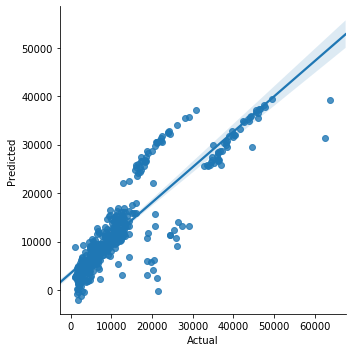

In [48]:
sns.lmplot(x='Actual',y='Predicted',data=df)

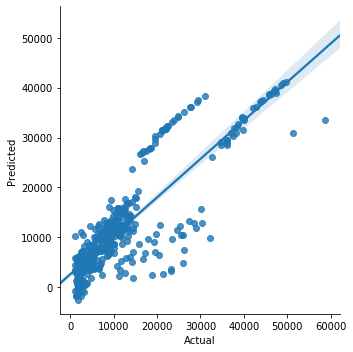

In [49]:
sns.lmplot(x='Actual',y='Predicted',data=df1)

## Regularisation

In [50]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [51]:
rr = Ridge(alpha=0.01)
rr.fit(xtrain, ytrain) 
pred_train_rr= rr.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train_rr)))
print(r2_score(ytrain, pred_train_rr))

pred_test_rr= rr.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred_test_rr))) 
print(r2_score(ytest, pred_test_rr))

6140.1650320574945
0.7454618031551434
5820.601904930472
0.7628488010590998


In [52]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(xtrain, ytrain) 
pred_train_lasso= model_lasso.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train_lasso)))
print(r2_score(ytrain, pred_train_lasso))

pred_test_lasso= model_lasso.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred_test_lasso))) 
print(r2_score(ytest, pred_test_lasso))

6140.165031135464
0.7454618032315883
5820.593645238025
0.7628494741147764


In [53]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(xtrain1, ytrain1) 
pred_train_lasso= model_lasso.predict(xtrain1)
print(np.sqrt(mean_squared_error(ytrain1,pred_train_lasso)))
print(r2_score(ytrain1, pred_train_lasso))

pred_test_lasso= model_lasso.predict(xtest1)
print(np.sqrt(mean_squared_error(ytest1,pred_test_lasso))) 
print(r2_score(ytest1, pred_test_lasso))

6072.872735216461
0.7533867859398834
5998.955604970966
0.7404836678181408


In [55]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(xtrain, ytrain) 
pred_train_enet= model_enet.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train_enet)))
print(r2_score(ytrain, pred_train_enet))

pred_test_enet= model_enet.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred_test_enet)))
print(r2_score(ytest, pred_test_enet))

6140.375949741183
0.7454443158307185
5824.922268070049
0.7624966177062352
